<a href="https://colab.research.google.com/github/Vaishwik369/File-Sharing-Socket-Programming/blob/main/thyroid_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the uploaded dataset
file_path = 'Thyroid_Diff.csv'
df = pd.read_csv(file_path)

# Show basic information and first few rows to understand the structure
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

(None,
    Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
 0   27      F      No         No              No        Euthyroid   
 1   34      F      No        Yes              No        Euthyroid   
 2   30      F      No         No              No        Euthyroid   
 3   62      F      No         No              No        Euthyroid   
 4   62      F      No         No              No        Euthyroid   
 
           Physical Examination Adenopathy       Pathology     Focality Risk  \
 0   Single nodular goiter-left         No  Micropapillary    Uni-Focal  Low   
 1          Multinodular goiter         No  Micropapillary    Uni-Focal  Low   
 2  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
 3  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
 4          Multinodular goiter         No  Micropapillary  Multi-Focal  Low   
 
      T   N   M Stage       Response Recurred  
 0  T1a  N0  M0     I  Indeterminate     

In [2]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Encode all categorical columns
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

# Show the first few rows after encoding
df.head()


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split the dataset into features (X) and target (y)
X = df.drop('Age', axis=1).values
y = df['Age'].values

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature normalization
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test = (X_test - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)

# Add an intercept column to X_train and X_test (for theta_0)
X_train_with_intercept


array([[ 1.        , -0.51933568, -0.40434898, ..., -0.32628   ,
        -0.63689373, -0.64042037],
       [ 1.        , -0.51933568, -0.40434898, ...,  1.04141424,
         1.51658121,  1.56147438],
       [ 1.        , -0.51933568, -0.40434898, ..., -0.32628   ,
         0.43984374, -0.64042037],
       ...,
       [ 1.        , -0.51933568, -0.40434898, ..., -0.32628   ,
         0.43984374, -0.64042037],
       [ 1.        , -0.51933568, -0.40434898, ...,  1.04141424,
         1.51658121,  1.56147438],
       [ 1.        , -0.51933568, -0.40434898, ..., -0.32628   ,
        -0.63689373, -0.64042037]])

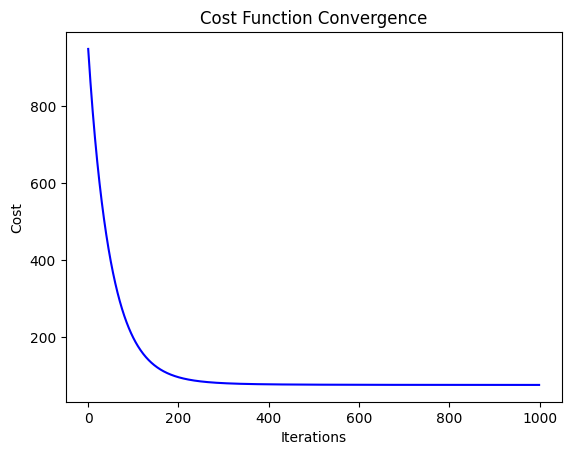

array([ 4.12498531e+01, -4.22093330e-01,  1.71038976e+00, -2.76889857e-01,
       -1.38518325e+00,  2.78958423e-02,  8.61191029e-01, -2.75221403e-01,
       -1.27992703e+00, -1.13785395e+00, -9.85508563e-01, -2.31657578e+00,
       -2.28478913e+00, -3.28944483e+00,  9.52919897e+00,  9.15122328e-01,
        1.69991304e+00])

In [5]:
# Initialize theta with the correct size (number of features + 1 for intercept)
theta = np.zeros(X_train_with_intercept.shape[1])

# Run gradient descent again
theta, cost_history = gradient_descent(X_train_with_intercept, y_train, theta, learning_rate, iterations)

# Plot cost function convergence
plt.plot(range(iterations), cost_history, 'b')
plt.title("Cost Function Convergence")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

theta  # Output the final theta (parameters) after gradient descent


In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict values for X_test
y_pred = X_test_with_intercept.dot(theta)

# 1. Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# 2. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# 3. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# 4. R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# 5. Adjusted R-squared
n = len(y_test)  # number of data points
p = X_test.shape[1]  # number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r2}")


Mean Squared Error (MSE): 172.41573525983148
Mean Absolute Error (MAE): 9.58297629337938
Root Mean Squared Error (RMSE): 13.130717240875743
R-squared (R²): 0.18817144376377581
Adjusted R-squared: -0.02831617123255059


Mean Squared Error (MSE): 172.41573525983148
Mean Absolute Error (MAE): 9.58297629337938
Root Mean Squared Error (RMSE): 13.130717240875743
R-squared (R²): 0.18817144376377581
Adjusted R-squared: -0.02831617123255059


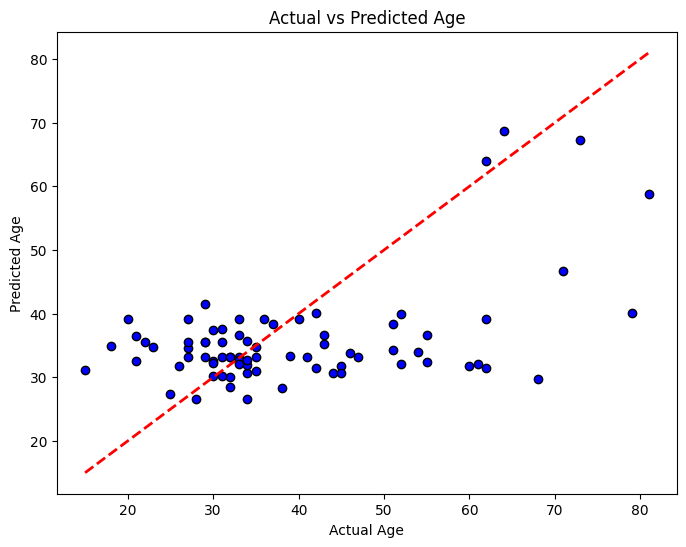

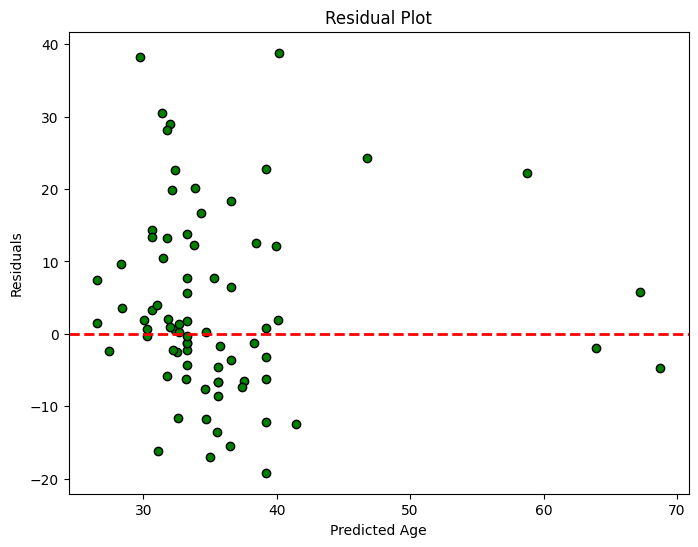

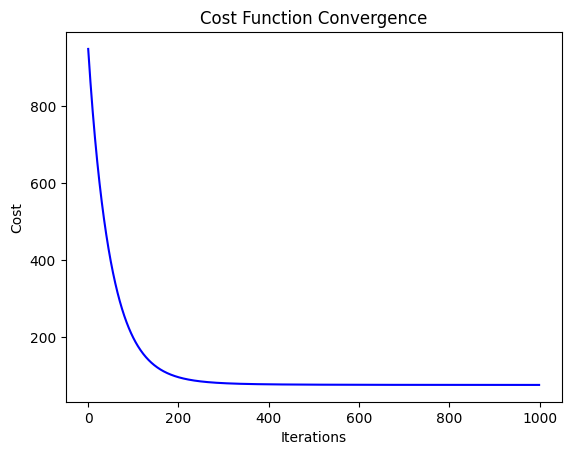

In [7]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Predict values for X_test
y_pred = X_test_with_intercept.dot(theta)

# 1. Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# 2. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# 3. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# 4. R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# 5. Adjusted R-squared
n = len(y_test)  # number of data points
p = X_test.shape[1]  # number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r2}")

# === Plotting Graphs ===

# 1. Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs Predicted Age')
plt.show()

# 2. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='green', edgecolors='k')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Age')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# 3. Cost Function Convergence (already plotted)
plt.plot(range(iterations), cost_history, 'b')
plt.title("Cost Function Convergence")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()
